# pycwr (Python China Weather Radar tools Libarary) Overview

In [4]:
%matplotlib inline
from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr

## Read compressed China radar data
radar_io can identify radar data types

In [5]:
filename = r"G:\tool\radar_tool\data\Z_RADR_I_Z9898_20190828181529_O_DOR_SAD_CAP_FMT.bin.bz2"

In [6]:
basedata = radar_io(filename) 

### Convert radar basedata to PRD class

In [7]:
PRD = basedata.ToPRD()

In [8]:
PRD.scan_info

<xarray.Dataset>
Dimensions:            (sweep: 9)
Coordinates:
  * sweep              (sweep) int32 0 1 2 3 4 5 6 7 8
Data variables:
    latitude           float64 20.0
    longitude          float64 110.2
    altitude           int32 118
    scan_type          <U3 'ppi'
    frequency          float64 2.73
    start_time         datetime64[ns] 2019-08-28T18:16:02.393134
    end_time           datetime64[ns] 2019-08-28T18:21:01.712371
    nyquist_velocity   (sweep) float32 27.83 27.83 ... 32.416397 32.416397
    unambiguous_range  (sweep) int32 300000 300000 146000 ... 124000 124000
    rays_per_sweep     (sweep) int64 361 361 363 362 363 361 364 364 364
    fixed_angle        (sweep) float32 0.48339844 1.4941406 ... 19.511719
    beam_width         (sweep) float64 0.9972 0.9972 0.9917 ... 0.989 0.989

In [9]:
PRD.fields[0]

<xarray.Dataset>
Dimensions:    (range: 1200, time: 361)
Coordinates:
    azimuth    (time) float64 285.3 286.2 287.2 288.2 ... 283.1 284.1 285.1
    elevation  (time) float64 0.48 0.48 0.48 0.48 0.48 ... 0.52 0.52 0.52 0.52
    x          (time, range) float64 -241.2 -482.3 ... -2.891e+05 -2.894e+05
    y          (time, range) float64 65.84 131.7 197.5 ... 7.813e+04 7.819e+04
    z          (time, range) float64 238.1 240.2 242.3 ... 8.241e+03 8.252e+03
    lat        (time, range) float64 20.0 20.0 20.0 20.0 ... 20.68 20.68 20.68
    lon        (time, range) float64 110.2 110.2 110.2 ... 107.5 107.5 107.5
  * range      (range) float64 250.0 500.0 750.0 ... 2.995e+05 2.998e+05 3e+05
  * time       (time) datetime64[ns] 2019-08-28T18:16:02.393134 ... 2019-08-28T18:16:25.134606
Data variables:
    V          (time, range) float64 nan nan nan nan -5.5 ... nan nan nan nan
    W          (time, range) float64 nan nan nan nan 1.0 ... nan nan nan nan nan
    dBT        (time, range) float64 nan nan nan nan 34.0 ... nan nan nan nan
    dBZ        (time, range) float64 nan nan nan nan -7.5 ... nan nan nan nan
    SQI        (time, range) float64 nan nan nan nan 0.93 ... nan nan nan nan
    ZDR        (time, range) float64 nan nan nan nan 0.93 ... nan nan nan nan
    CC         (time, range) float64 nan nan nan nan 0.88 ... nan nan nan nan
    PhiDP      (time, range) float64 nan nan nan nan 32.98 ... nan nan nan nan
    KDP        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    Zc         (time, range) float64 nan nan nan nan 34.0 ... nan -7.5 nan nan

## Visualizing radar data

In [10]:
from pycwr.draw.SingleRadarPlot import RadarGraph
from pycwr.draw.SingleRadarPlotMap import RadarGraphMap

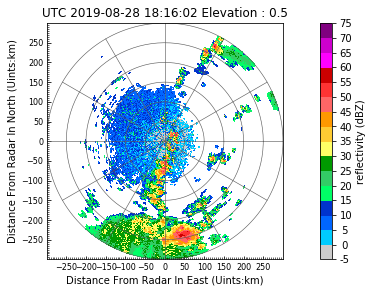

In [11]:
graph = RadarGraph(PRD)
graph.plot(0, "dBZ", continuously=False) ##level 1, "dBZ"

In [12]:
graph.plot?

Signature:
graph.plot(
    sweep,
    field_name,
    normvar=None,
    title=None,
    clabel=None,
    dark=False,
    continuously=False,
)
Docstring:
绘图
:param sweep: sweep从0开始
:param field_name: 产品场的名称
:return:
File:      c:\users\zy\anaconda3\lib\site-packages\pycwr\draw\singleradarplot.py
Type:      method


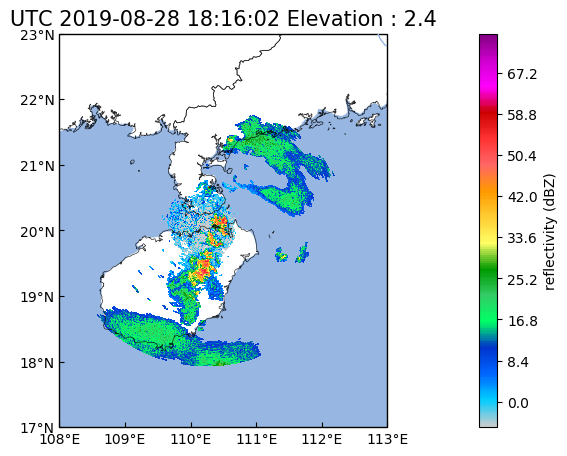

In [13]:
graph = RadarGraphMap(PRD)
graph.plot(2, "dBZ", continuously=True)

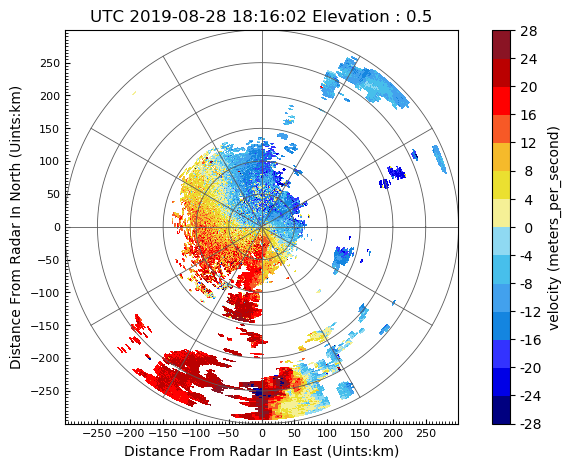

In [14]:
graph = RadarGraph(PRD)
graph.plot(0, "V", continuously=False)

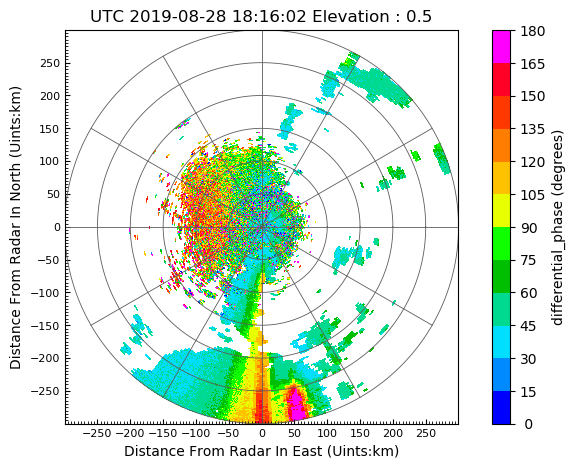

In [15]:
graph = RadarGraph(PRD)
graph.plot(0, "PhiDP", continuously=False)

## VCS plot

In [16]:
from pycwr.draw.VerticalSectionPlot import VerticalSection

In [17]:
vcs = VerticalSection(PRD)

In [18]:
vcs.section?

Signature:
vcs.section(
    start_point,
    end_point,
    field_name,
    height=(0, 18),
    title=None,
    clabel=None,
    continuously=False,
)
Docstring:
:param start_point: (start_x, start_y), units:km
:param end_point: (end_x, end_y), units:km
:param field_name: field names eg: dBZ
:param height: height to show (min_height, max_height), units:km
:param title:  the title to show top of graph
:param clabel: the title of cbar
:param continuously: if True, using continuously colormap
:return:
File:      c:\users\zy\anaconda3\lib\site-packages\pycwr\draw\verticalsectionplot.py
Type:      method


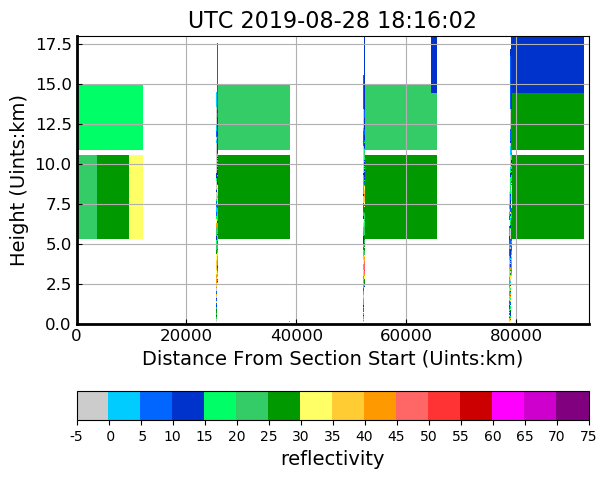

In [19]:
vcs.section((6500, -27344), (16000, -120000), "dBZ")

## radar data indexing and selecting
### Keywords for different radar products

'dBT':'total_power'

'dBZ': "reflectivity"

'V': "velocity"

'W': "spectrum_width"

'SQI':'normalized_coherent_power'

'ZDR': "differential_reflectivity"

'LDR': "linear_depolarization_ratio"

'CC': "cross_correlation_ratio"

'PhiDP': "differential_phase"

'KDP': "specific_differential_phase"

'CF': "clutter_flag"

'Zc': "corrected_reflectivity"

'Vc': "corrected_velocity"

### select correlation coefficient of the second sweep

In [20]:
cc = PRD.fields[1]['CC']  ##python indexing from 0

In [21]:
cc

<xarray.DataArray 'CC' (time: 361, range: 1200)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    azimuth    (time) float64 337.8 338.8 339.8 340.7 ... 335.6 336.6 337.6
    elevation  (time) float64 1.49 1.49 1.49 1.49 1.49 ... 1.53 1.53 1.53 1.53
    x          (time, range) float64 -94.47 -188.9 ... -1.14e+05 -1.141e+05
    y          (time, range) float64 231.4 462.7 694.1 ... 2.767e+05 2.769e+05
    z          (time, range) float64 242.5 249.0 255.5 ... 1.352e+04 1.353e+04
    lat        (time, range) float64 20.0 20.0 20.0 20.0 ... 22.48 22.48 22.48
    lon        (time, range) float64 110.2 110.2 110.2 ... 109.1 109.1 109.1
  * range      (range) float64 250.0 500.0 750.0 ... 2.995e+05 2.998e+05 3e+05
  * time       (time) datetime64[ns] 2019-08-28T18:17:01.349754 ... 2019-08-28T18:17:24.091151
Attributes:
    units:          ratio
    standard_name:  cross_correlation_ratio_hv
    long_name:      Cross correlation ratio (RHOHV)
    valid_max:      1.0
    valid_min:      0.0
    coordinates:    elevation azimuth range

In [22]:
cc.shape

(361, 1200)

In [23]:
cc.azimuth

<xarray.DataArray 'azimuth' (time: 361)>
array([337.79000854, 338.77999878, 339.76000977, 340.72000122,
       341.66000366, 342.61999512, 343.57000732, 344.54998779,
       345.52999878, 346.51000977, 347.47000122, 348.47000122,
       349.47000122, 350.45999146, 351.44000244, 352.42999268,
       353.45999146, 354.45999146, 355.45001221, 356.42001343,
       357.41000366, 358.42001343, 359.42999268,   0.43000001,
         1.40999997,   2.3900001 ,   3.42000008,   4.42000008,
         5.4000001 ,   6.38000011,   7.36999989,   8.39999962,
         9.39999962,  10.38000011,  11.35999966,  12.36999989,
        13.39000034,  14.39000034,  15.38000011,  16.38999939,
        17.37999916,  18.37000084,  19.37000084,  20.38999939,
        21.37999916,  22.37000084,  23.37999916,  24.37999916,
        25.40999985,  26.39999962,  27.37999916,  28.37999916,
        29.38999939,  30.38999939,  31.40999985,  32.40000153,
        33.40000153,  34.40999985,  35.40999985,  36.40999985,
        37.41999817,  38.41999817,  39.40999985,  40.38000107,
        41.40000153,  42.40999985,  43.40000153,  44.41999817,
        45.40999985,  46.40999985,  47.41999817,  48.41999817,
        49.41999817,  50.43000031,  51.43000031,  52.40999985,
        53.40999985,  54.43000031,  55.41999817,  56.43999863,
        57.45000076,  58.45000076,  59.43000031,  60.40000153,
        61.40999985,  62.43000031,  63.41999817,  64.43000031,
        65.44000244,  66.43000031,  67.40000153,  68.41000366,
        69.41999817,  70.41999817,  71.40000153,  72.41999817,
        73.41999817,  74.44999695,  75.44000244,  76.43000031,
        77.40000153,  78.41000366,  79.41999817,  80.41999817,
        81.43000031,  82.43000031,  83.43000031,  84.41999817,
        85.43000031,  86.45999908,  87.47000122,  88.44999695,
        89.41999817,  90.43000031,  91.44000244,  92.44000244,
        93.43000031,  94.44000244,  95.44000244,  96.44000244,
        97.44999695,  98.44999695,  99.47000122, 100.47000122,
       101.45999908, 102.44999695, 103.45999908, 104.45999908,
       105.47000122, 106.47000122, 107.47000122, 108.44999695,
       109.47000122, 110.47000122, 111.48999786, 112.48000336,
       113.48000336, 114.47000122, 115.48000336, 116.48000336,
       117.45999908, 118.47000122, 119.48000336, 120.47000122,
       121.47000122, 122.48000336, 123.48000336, 124.48999786,
       125.48000336, 126.48000336, 127.48999786, 128.46000671,
       129.47000122, 130.47000122, 131.5       , 132.49000549,
       133.49000549, 134.47000122, 135.49000549, 136.47999573,
       137.47000122, 138.47000122, 139.49000549, 140.47999573,
       141.47000122, 142.47999573, 143.49000549, 144.46000671,
       145.44000244, 146.47000122, 147.5       , 148.52000427,
       149.49000549, 150.47999573, 151.49000549, 152.5       ,
       153.49000549, 154.47999573, 155.49000549, 156.49000549,
       157.5       , 158.5       , 159.49000549, 160.50999451,
       161.50999451, 162.5       , 163.49000549, 164.5       ,
       165.50999451, 166.50999451, 167.50999451, 168.53999329,
       169.55000305, 170.52999878, 171.52000427, 172.52999878,
       173.52999878, 174.52000427, 175.52000427, 176.52999878,
       177.52999878, 178.5       , 179.50999451, 180.52000427,
       181.53999329, 182.55000305, 183.55999756, 184.55999756,
       185.55999756, 186.52999878, 187.53999329, 188.55000305,
       189.55000305, 190.52999878, 191.52999878, 192.53999329,
       193.52999878, 194.52000427, 195.52000427, 196.53999329,
       197.52999878, 198.52999878, 199.53999329, 200.53999329,
       201.52000427, 202.52000427, 203.52999878, 204.52999878,
       205.53999329, 206.55000305, 207.55000305, 208.55000305,
       209.55999756, 210.55000305, 211.52999878, 212.50999451,
       213.53999329, 214.53999329, 215.52000427, 216.52999878,
       217.53999329, 218.52999878, 219.52000427, 220.53999329,
       221.53999329, 222.52999878, 223.52000427, 224.52999878,
       225.57000732, 226.58000183, 227.55999756, 228.

In [24]:
cc.range

<xarray.DataArray 'range' (range: 1200)>
array([2.5000e+02, 5.0000e+02, 7.5000e+02, ..., 2.9950e+05, 2.9975e+05,
       3.0000e+05])
Coordinates:
  * range    (range) float64 250.0 500.0 750.0 ... 2.995e+05 2.998e+05 3e+05
Attributes:
    units:                meters
    standard_name:        projection_range_coordinate
    long_name:            range_to_measurement_volume
    axis:                 radial_range_coordinate
    spacing_is_constant:  true
    comment:              Coordinate variable for range. Range to center of e...

### select the correlation coefficient of 50km away from the radar

In [25]:
cc.sel(range=50000, method='nearest')

<xarray.DataArray 'CC' (time: 361)>
array([0.95499998, 0.75      , 0.75      , 0.94999999, 0.83999997,
       0.80000001, 0.73500001, 0.70499998,        nan,        nan,
              nan, 0.59500003, 0.55000001, 0.875     ,        nan,
              nan, 0.755     , 0.94999999, 1.04999995, 1.04999995,
       1.02999997, 0.85500002, 1.01999998, 0.88999999, 0.88999999,
       0.98500001, 1.02999997, 0.43000001, 0.43000001, 1.04999995,
       1.04999995, 0.94499999, 0.81      , 0.86000001,        nan,
              nan,        nan,        nan,        nan, 0.83499998,
       0.34      ,        nan,        nan,        nan,        nan,
       0.83999997, 0.90499997,        nan,        nan,        nan,
              nan, 0.34999999, 0.63499999, 0.935     ,        nan,
              nan,        nan, 1.04999995, 0.53500003, 1.04499996,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.685     ,
       0.89499998,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.74000001,
       1.03499997, 0.96499997, 0.745     , 0.98000002, 0.98000002,
              nan,        nan,        nan,        nan,        nan,
              nan, 1.04999995, 1.04999995, 0.77499998, 0.80000001,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.96499997,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.83499998, 0.98000002, 0.995     , 1.01499999, 0.995     ,
       0.98000002, 0.995     , 0.995     , 0.98500001, 0.995     ,
       0.995     , 1.02499998, 1.02999997, 1.02499998, 0.995     ,
              nan,        nan, 1.04999995, 1.00999999, 0.96499997,
       0.98500001, 0.99000001, 0.995     , 0.97500002, 0.98500001,
       0.99000001, 0.98500001, 0.96499997, 0.995     , 0.99000001,
       0.98500001, 0.99000001, 0.995     , 1.        , 0.995     ,
       0.995     , 0.98500001, 0.99000001, 0.995     , 0.74000001,
       0.89999998, 0.98500001, 1.        , 0.995     , 0.995     ,
       0.995     , 0.98500001, 0.995     , 0.995     , 0.995     ,
       0.99000001, 0.98000002, 0.98000002, 0.995     , 0.995     ,
       0.99000001, 0.98500001, 0.935     ,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.93000001,        nan,        nan,        nan,        nan,
       0.95499998, 0.79000002, 0.95499998,        nan,        nan,
       0.92500001, 0.89499998,        nan,        nan,        nan,
              nan,        nan, 0.64999998, 1.00999999,        nan,
              nan,        nan,        nan,        nan, 0.30500001,
       0.64499998, 0.16500001, 0.43000001,        nan,        nan,
              nan, 0.27000001, 0.95499998, 1.04999995, 0.18000001,
       0.52999997, 0.39500001,        nan, 0.55000001, 0.91000003,
              nan,        nan,        nan,        nan, 1.04499996,
       0.995     ,        nan, 0.30000001, 1.04999995, 1.        ,
              nan,        nan, 1.04999995, 0.79000002, 0.76999998,
       0.94

### select the correlation coefficient in 20-50km

In [26]:
cc_sel = cc.sel(range=slice(20000,50000))

In [27]:
cc_sel

<xarray.DataArray 'CC' (time: 361, range: 121)>
array([[1.04999995, 0.67500001, 1.04999995, ..., 1.04999995, 0.41999999,
        0.95499998],
       [0.88499999, 0.815     , 0.85000002, ..., 0.68000001, 0.88      ,
        0.75      ],
       [0.88499999, 0.815     , 0.85000002, ..., 0.68000001, 0.88      ,
        0.75      ],
       ...,
       [       nan, 0.95999998, 0.60500002, ..., 0.34999999, 1.        ,
        0.215     ],
       [       nan, 0.76999998, 0.37      , ..., 0.87      , 0.81      ,
        1.04999995],
       [0.86000001, 1.04999995, 1.04999995, ..., 1.04999995, 0.95999998,
        0.95499998]])
Coordinates:
    azimuth    (time) float64 337.8 338.8 339.8 340.7 ... 335.6 336.6 337.6
    elevation  (time) float64 1.49 1.49 1.49 1.49 1.49 ... 1.53 1.53 1.53 1.53
    x          (time, range) float64 -7.557e+03 -7.651e+03 ... -1.904e+04
    y          (time, range) float64 1.851e+04 1.874e+04 ... 4.597e+04 4.621e+04
    z          (time, range) float64 779.6 786.7 793.8 ... 1.71e+03 1.718e+03
    lat        (time, range) float64 20.16 20.16 20.17 ... 20.41 20.41 20.41
    lon        (time, range) float64 110.2 110.2 110.2 ... 110.1 110.1 110.1
  * range      (range) float64 2e+04 2.025e+04 2.05e+04 ... 4.975e+04 5e+04
  * time       (time) datetime64[ns] 2019-08-28T18:17:01.349754 ... 2019-08-28T18:17:24.091151
Attributes:
    units:          ratio
    standard_name:  cross_correlation_ratio_hv
    long_name:      Cross correlation ratio (RHOHV)
    valid_max:      1.0
    valid_min:      0.0
    coordinates:    elevation azimuth range

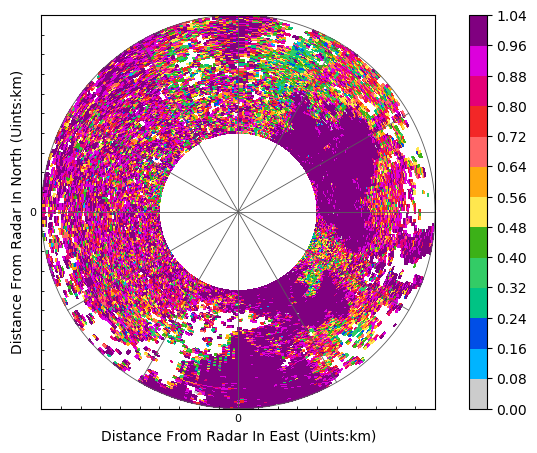

In [28]:
from pycwr.draw.SingleRadarPlot import RadarGraph
RadarGraph.simple_plot_ppi(_range=cc_sel.range, azimuth=cc_sel.azimuth, elevation=cc_sel.elevation,\
                           radar_data=cc_sel, cmap="CN_ref", normvar=(0,1))

### Select the reflectivity factor at range in 60km and azimuth in 34 °

In [29]:
dbz = PRD.fields[0]['dBZ']
da_array = dbz.swap_dims({"time": "azimuth"})

In [30]:
da_array

<xarray.DataArray 'dBZ' (azimuth: 361, range: 1200)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * azimuth    (azimuth) float64 285.3 286.2 287.2 288.2 ... 283.1 284.1 285.1
    elevation  (azimuth) float64 0.48 0.48 0.48 0.48 ... 0.52 0.52 0.52 0.52
    x          (azimuth, range) float64 -241.2 -482.3 ... -2.891e+05 -2.894e+05
    y          (azimuth, range) float64 65.84 131.7 ... 7.813e+04 7.819e+04
    z          (azimuth, range) float64 238.1 240.2 ... 8.241e+03 8.252e+03
    lat        (azimuth, range) float64 20.0 20.0 20.0 ... 20.68 20.68 20.68
    lon        (azimuth, range) float64 110.2 110.2 110.2 ... 107.5 107.5 107.5
  * range      (range) float64 250.0 500.0 750.0 ... 2.995e+05 2.998e+05 3e+05
    time       (azimuth) datetime64[ns] 2019-08-28T18:16:02.393134 ... 2019-08-28T18:16:25.134606
Attributes:
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    long_name:      Reflectivity
    valid_max:      80.0
    valid_min:      -30.0
    coordinates:    elevation azimuth range

In [31]:
sort_dbz = da_array.sortby("azimuth", ascending=True)

In [32]:
sort_dbz.sel(azimuth=34, range=60000, method='nearest')

<xarray.DataArray 'dBZ' ()>
array(-1.)
Coordinates:
    azimuth    float64 33.88
    elevation  float64 0.52
    x          float64 3.344e+04
    y          float64 4.981e+04
    z          float64 992.4
    lat        float64 20.44
    lon        float64 110.6
    range      float64 6e+04
    time       datetime64[ns] 2019-08-28T18:16:09.278751
Attributes:
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    long_name:      Reflectivity
    valid_max:      80.0
    valid_min:      -30.0
    coordinates:    elevation azimuth range

### select data between 120 ° and 270 ° azimuth

In [33]:
dbz_test = sort_dbz.sel(azimuth=slice(120,240))

In [34]:
dbz_test

<xarray.DataArray 'dBZ' (azimuth: 119, range: 1200)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * azimuth    (azimuth) float64 121.0 122.0 123.0 124.0 ... 237.1 238.1 239.1
    elevation  (azimuth) float64 0.48 0.48 0.48 0.48 ... 0.52 0.52 0.52 0.52
    x          (azimuth, range) float64 214.4 428.7 ... -2.569e+05 -2.571e+05
    y          (azimuth, range) float64 -128.6 -257.2 ... -1.54e+05 -1.541e+05
    z          (azimuth, range) float64 238.1 240.2 ... 8.241e+03 8.252e+03
    lat        (azimuth, range) float64 20.0 19.99 19.99 ... 18.6 18.6 18.59
    lon        (azimuth, range) float64 110.2 110.2 110.3 ... 107.8 107.8 107.8
  * range      (range) float64 250.0 500.0 750.0 ... 2.995e+05 2.998e+05 3e+05
    time       (azimuth) datetime64[ns] 2019-08-28T18:16:14.774610 ... 2019-08-28T18:16:22.228716
Attributes:
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    long_name:      Reflectivity
    valid_max:      80.0
    valid_min:      -30.0
    coordinates:    elevation azimuth range

### show this area result

In [35]:
from pycwr.draw.SingleRadarPlot import RadarGraph

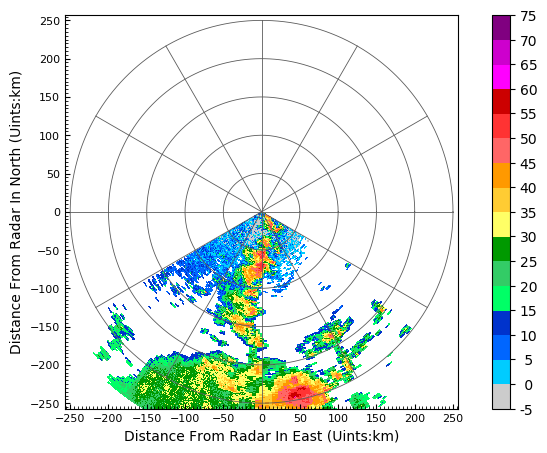

In [36]:
RadarGraph.simple_plot_ppi(_range=dbz_test.range, azimuth=dbz_test.azimuth, elevation=dbz_test.elevation,\
                           radar_data=dbz_test, cmap="CN_ref", normvar=(-5,75))

### Radar coordinate system transformation, select the second sweep as example

In [37]:
level2 = PRD.fields[1]

In [38]:
level2

<xarray.Dataset>
Dimensions:    (range: 1200, time: 361)
Coordinates:
    azimuth    (time) float64 337.8 338.8 339.8 340.7 ... 335.6 336.6 337.6
    elevation  (time) float64 1.49 1.49 1.49 1.49 1.49 ... 1.53 1.53 1.53 1.53
    x          (time, range) float64 -94.47 -188.9 ... -1.14e+05 -1.141e+05
    y          (time, range) float64 231.4 462.7 694.1 ... 2.767e+05 2.769e+05
    z          (time, range) float64 242.5 249.0 255.5 ... 1.352e+04 1.353e+04
    lat        (time, range) float64 20.0 20.0 20.0 20.0 ... 22.48 22.48 22.48
    lon        (time, range) float64 110.2 110.2 110.2 ... 109.1 109.1 109.1
  * range      (range) float64 250.0 500.0 750.0 ... 2.995e+05 2.998e+05 3e+05
  * time       (time) datetime64[ns] 2019-08-28T18:17:01.349754 ... 2019-08-28T18:17:24.091151
Data variables:
    V          (time, range) float64 nan nan nan nan -5.5 ... nan nan nan nan
    W          (time, range) float64 nan nan nan nan 3.5 ... nan nan nan nan nan
    dBT        (time, range) float64 nan nan nan nan 28.0 ... nan nan nan nan
    dBZ        (time, range) float64 nan nan nan nan 3.0 ... nan nan nan nan nan
    SQI        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    ZDR        (time, range) float64 nan nan nan nan 0.2 ... nan nan nan nan nan
    CC         (time, range) float64 nan nan nan nan 0.62 ... nan nan nan nan
    PhiDP      (time, range) float64 nan nan nan nan 11.26 ... nan nan nan nan
    KDP        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    Zc         (time, range) float64 nan nan nan nan ... -3.5 -5.5 -7.5 -7.5

#### Radar coordinate system to Cartesian coordinate system

In [39]:
from pycwr.core.transforms import antenna_vectors_to_cartesian

In [40]:
isinstance(level2.range, xr.DataArray)

True

In [41]:
assert isinstance(level2.range, np.ndarray) | isinstance(level2.range, xr.DataArray), "check"

In [42]:
x, y, z = antenna_vectors_to_cartesian(level2.range, level2.azimuth, level2.elevation)

In [43]:
x

array([[-9.44685345e+01, -1.88936924e+02, -2.83405169e+02, ...,
        -1.13023031e+05, -1.13117210e+05, -1.13211388e+05],
       [-9.04568376e+01, -1.80913537e+02, -2.71370097e+02, ...,
        -1.08223400e+05, -1.08313579e+05, -1.08403758e+05],
       [-8.64589769e+01, -1.72917821e+02, -2.59376533e+02, ...,
        -1.03440322e+05, -1.03526516e+05, -1.03612709e+05],
       ...,
       [-1.03120007e+02, -2.06239852e+02, -3.09359535e+02, ...,
        -1.23370708e+05, -1.23473506e+05, -1.23576304e+05],
       [-9.91313730e+01, -1.98262590e+02, -2.97393651e+02, ...,
        -1.18598786e+05, -1.18697608e+05, -1.18796430e+05],
       [-9.51932857e+01, -1.90386422e+02, -2.85579408e+02, ...,
        -1.13887337e+05, -1.13982234e+05, -1.14077130e+05]])

### Converting a Cartesian coordinate system to a latitude and longitude coordinate system

In [44]:
from pycwr.core.transforms import cartesian_to_geographic_aeqd

In [45]:
lon, lat = cartesian_to_geographic_aeqd(x, y, PRD.scan_info.longitude.values, PRD.scan_info.latitude.values)

In [46]:
lon.min()

107.37962340929893

In [47]:
lon

array([[110.24493026, 110.24402615, 110.24312201, ..., 109.14612275,
        109.14519051, 109.14425824],
       [110.24496865, 110.24410293, 110.24323719, ..., 109.19269542,
        109.19180254, 109.19090964],
       [110.24500691, 110.24417945, 110.24335197, ..., 109.23912467,
        109.23827105, 109.23741741],
       ...,
       [110.24484746, 110.24386055, 110.24287361, ..., 109.04577973,
        109.04476276, 109.04374576],
       [110.24488563, 110.2439369 , 110.24298813, ..., 109.09204306,
        109.09106516, 109.09008723],
       [110.24492332, 110.24401227, 110.2431012 , ..., 109.13773894,
        109.13679963, 109.13586031]])

In [48]:
lat

array([[19.99847017, 20.00055095, 20.00263172, ..., 22.48239265,
        22.48446111, 22.48652955],
       [19.99848454, 20.00057969, 20.00267482, ..., 22.49986993,
        22.5019532 , 22.50403646],
       [19.99849815, 20.0006069 , 20.00271565, ..., 22.51642371,
        22.51852101, 22.52061831],
       ...,
       [19.99843664, 20.00048387, 20.0025311 , ..., 22.44154828,
        22.44358207, 22.44561585],
       [19.99845251, 20.00051562, 20.00257872, ..., 22.46085027,
        22.46290042, 22.46495056],
       [19.99846745, 20.00054551, 20.00262356, ..., 22.47902694,
        22.4810925 , 22.48315804]])

## Match ground station

In [49]:
lat_station = np.array([20.5, 19.2, 21])
lon_station = np.array([108.9, 110.1, 111.5])
npoint = lon_station.shape[0]

### Calculate distance from each point (degree)

In [50]:
range_point = (lat[...,np.newaxis] - lat_station.reshape(1,1,-1))**2 + \
(lon[...,np.newaxis] - lon_station.reshape(1,1,-1))**2  

In [51]:
range_point.shape

(361, 1200, 3)

### Find the row and column of the array corresponding to station

In [52]:
index_station = []
for i in range(npoint):
    ind = np.unravel_index(range_point[:,:,i].argmin(), range_point[:,:,i].shape)
    index_station.append(ind)

In [53]:
index_station

[(314, 604), (212, 359), (72, 687)]

### select station data

In [54]:
for ind in index_station:
    print(level2.isel(time=ind[0], range=ind[1]))

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    azimuth    float64 291.6
    elevation  float64 1.53
    x          float64 -1.405e+05
    y          float64 5.563e+04
    z          float64 5.619e+03
    lat        float64 20.49
    lon        float64 108.9
    range      float64 1.512e+05
    time       datetime64[ns] 2019-08-28T18:17:21.185338
Data variables:
    V          float64 nan
    W          float64 nan
    dBT        float64 nan
    dBZ        float64 nan
    SQI        float64 nan
    ZDR        float64 nan
    CC         float64 nan
    PhiDP      float64 nan
    KDP        float64 nan
    Zc         float64 -5.5
<xarray.Dataset>
Dimensions:    ()
Coordinates:
    azimuth    float64 189.6
    elevation  float64 1.49
    x          float64 -1.492e+04
    y          float64 -8.869e+04
    z          float64 3.053e+03
    lat        float64 19.2
    lon        float64 110.1
    range      float64 9e+04
    time       datetime64[ns] 2019-08-28T18:17:14.741931
Data variab

## attenuation correct

In [55]:
from pycwr.qc.attenuation import correct_attenuation_HB

In [56]:
dbz = PRD.fields[0]["dBZ"]

In [57]:
dbz_corr, pia = correct_attenuation_HB(dbz, a=1.67e-4, b=0.7)

C:\Users\zy\Anaconda3\lib\site-packages\pycwr\qc\attenuation.py:31: RuntimeWarning: overflow encountered in power
  k = a * (10.0 ** ((Ref[:, gate] + ksum) / 10.0)) ** b * 2.0 * gate_length


In [58]:
dbz

<xarray.DataArray 'dBZ' (time: 361, range: 1200)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    azimuth    (time) float64 285.3 286.2 287.2 288.2 ... 283.1 284.1 285.1
    elevation  (time) float64 0.48 0.48 0.48 0.48 0.48 ... 0.52 0.52 0.52 0.52
    x          (time, range) float64 -241.2 -482.3 ... -2.891e+05 -2.894e+05
    y          (time, range) float64 65.84 131.7 197.5 ... 7.813e+04 7.819e+04
    z          (time, range) float64 238.1 240.2 242.3 ... 8.241e+03 8.252e+03
    lat        (time, range) float64 20.0 20.0 20.0 20.0 ... 20.68 20.68 20.68
    lon        (time, range) float64 110.2 110.2 110.2 ... 107.5 107.5 107.5
  * range      (range) float64 250.0 500.0 750.0 ... 2.995e+05 2.998e+05 3e+05
  * time       (time) datetime64[ns] 2019-08-28T18:16:02.393134 ... 2019-08-28T18:16:25.134606
Attributes:
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    long_name:      Reflectivity
    valid_max:      80.0
    valid_min:      -30.0
    coordinates:    elevation azimuth range

### Remove echoes with low correlation coefficient in the first elevation

In [59]:
ref_1 = PRD.fields[0].dBZ
cc = PRD.fields[0].CC

In [60]:
out = xr.where(cc<0.9, np.nan, ref_1)

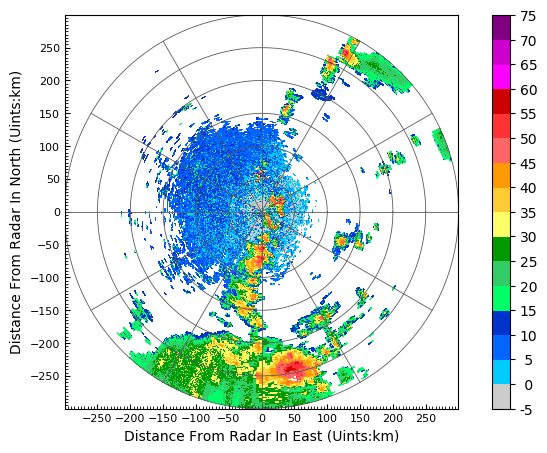

In [61]:
RadarGraph.simple_plot_ppi(_range=out.range, azimuth=out.azimuth, elevation=out.elevation, radar_data=out, cmap="CN_ref", normvar=(-5,75))

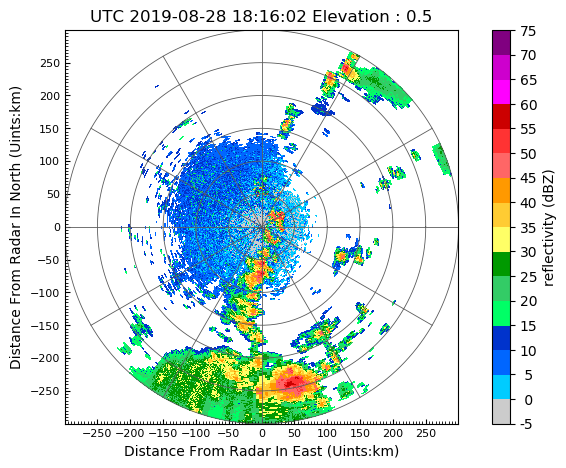

In [62]:
graph = RadarGraph(PRD)
graph.plot(0, "dBZ", continuously=False)

## using pycwr with Py-ART

In [63]:
import pyart
import matplotlib.pyplot as plt

In [64]:
radar = basedata.ToPyartRadar()

C:\Users\zy\Anaconda3\lib\site-packages\pyart\map\gates_to_grid.py:177: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


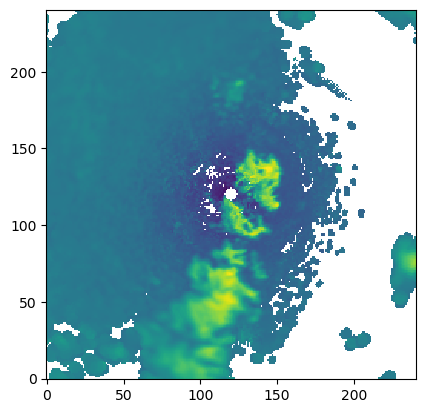

In [65]:
radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked('reflectivity')

# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radar,), gatefilters=(gatefilter, ),
    grid_shape=(1, 241, 241),
    grid_limits=((2000, 2000), (-123000.0, 123000.0), (-123000.0, 123000.0)),
    fields=['reflectivity'])

# create the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid.fields['reflectivity']['data'][0], origin='lower')
plt.show()

## save as cfradial format

In [66]:
pyart.io.write_cfradial("cfradial.nc", radar)

C:\Users\zy\Anaconda3\lib\site-packages\pyart\io\cfradial.py:719: UserWarning: Warning, converting non-array to array:pulse_width
  warnings.warn("Warning, converting non-array to array:%s" % name)


In [67]:
xr.open_dataset("cfradial.nc")

<xarray.Dataset>
Dimensions:                      (frequency: 1, range: 1200, sweep: 9, time: 3263)
Coordinates:
  * time                         (time) datetime64[ns] 2019-08-28T18:16:02.393133997 ... 2019-08-28T18:21:01.712371826
  * range                        (range) float64 250.0 500.0 ... 2.998e+05 3e+05
    azimuth                      (time) float64 ...
    elevation                    (time) float64 ...
  * frequency                    (frequency) float32 2730000000.0
Dimensions without coordinates: sweep
Data variables:
    velocity                     (time, range) float64 ...
    spectrum_width               (time, range) float64 ...
    total_power                  (time, range) float64 ...
    reflectivity                 (time, range) float64 ...
    normalized_coherent_power    (time, range) float64 ...
    differential_reflectivity    (time, range) float64 ...
    cross_correlation_ratio      (time, range) float64 ...
    differential_phase           (time, range) float64 ...
    specific_differential_phase  (time, range) float64 ...
    corrected_reflectivity       (time, range) float64 ...
    sweep_number                 (sweep) int32 ...
    fixed_angle                  (sweep) float32 ...
    sweep_start_ray_index        (sweep) int64 ...
    sweep_end_ray_index          (sweep) int64 ...
    sweep_mode                   (sweep) |S32 ...
    pulse_width                  (time) timedelta64[ns] ...
    radar_beam_width_h           float32 ...
    radar_beam_width_v           float32 ...
    nyquist_velocity             (time) float32 ...
    latitude                     float64 ...
    longitude                    float64 ...
    altitude                     float64 ...
    time_coverage_start          |S32 ...
    time_coverage_end            |S32 ...
    time_reference               |S32 ...
    volume_number                int32 ...
Attributes:
    Conventions:         CF/Radial instrument_parameters
    version:             1.3
    title:               
    institution:         
    references:          
    source:              
    comment:             
    instrument_name:     
    original_container:  WSR98D
    site_name:           haikou/"9yz
    radar_name:          WSR98D
    field_names:         velocity, spectrum_width, total_power, reflectivity,...
    history: